In [ ]:
#Increase the number of layers to 10 and also add residual networks


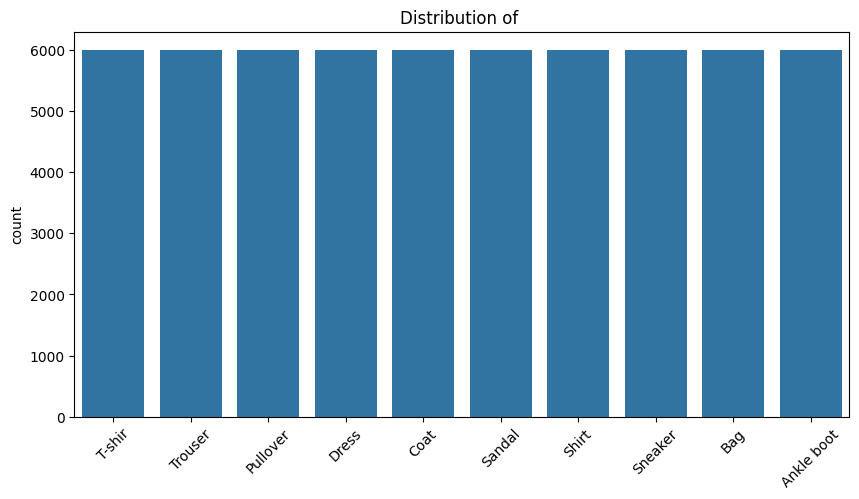

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
(train_images,train_labels),(test_images,test_labels)=tf.keras.datasets.fashion_mnist.load_data()
class_names=['T-shir','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
def plot_label_distribution(labels,class_names):
  plt.figure(figsize=(10,5))
  sns.countplot(x=labels)
  plt.xticks(ticks=np.arange(10),labels=class_names,rotation=45)
  plt.title("Distribution of ")
  plt.show()
plot_label_distribution(y_train,class_names)

In [ ]:
train_images = train_images/255.0
test_images = test_images/255.0

train_images = train_images.reshape(-1,784)
test_images = test_images.reshape(-1,784)

In [ ]:
def create_model():
  initializer=tf.keras.initializers.RandomNormal(mean=0.0,stddev=0.05)
  model=models.Sequential([
      layers.Input(shape=(784,)),
      layers.Dense(512,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dropout(0.4),

      layers.Dense(256,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dropout(0.3),

      layers.Dense(128,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dropout(0.2),

      layers.Dense(64,kernel_initializer=initializer),
      layers.BatchNormalization(),
      layers.Activation('relu'),
      layers.Dropout(0.1),

      layers.Dense(10,activation='softmax')
  ])
  return model

In [ ]:
model=create_model()
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 578,890 (2.21 MB)

 Trainable params: 576,970 (2.20 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
history=model.fit(train_images,train_labels,validation_split=0.2,epochs=10,batch_size=128,verbose=2)

Epoch 1/10
375/375 - 8s - 21ms/step - accuracy: 0.8933 - loss: 0.2905 - val_accuracy: 0.8822 - val_loss: 0.3312
Epoch 2/10
375/375 - 7s - 18ms/step - accuracy: 0.8949 - loss: 0.2851 - val_accuracy: 0.8830 - val_loss: 0.3246
Epoch 3/10
375/375 - 8s - 20ms/step - accuracy: 0.8972 - loss: 0.2791 - val_accuracy: 0.8886 - val_loss: 0.3084
Epoch 4/10
375/375 - 10s - 27ms/step - accuracy: 0.9014 - loss: 0.2701 - val_accuracy: 0.8842 - val_loss: 0.3250
Epoch 5/10
375/375 - 10s - 27ms/step - accuracy: 0.9022 - loss: 0.2690 - val_accuracy: 0.8862 - val_loss: 0.3161
Epoch 6/10
375/375 - 7s - 20ms/step - accuracy: 0.9031 - loss: 0.2617 - val_accuracy: 0.8813 - val_loss: 0.3260
Epoch 7/10
375/375 - 11s - 28ms/step - accuracy: 0.9069 - loss: 0.2543 - val_accuracy: 0.8844 - val_loss: 0.3229
Epoch 8/10
375/375 - 7s - 20ms/step - accuracy: 0.9084 - loss: 0.2496 - val_accuracy: 0.8905 - val_loss: 0.3042
Epoch 9/10
375/375 - 9s - 25ms/step - accuracy: 0.9118 - loss: 0.2425 - val_accuracy: 0.8947 - val_lo

In [ ]:
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=0)
print(f"Accuracy:{test_acc*100:.4f}")

Accuracy:87.8600


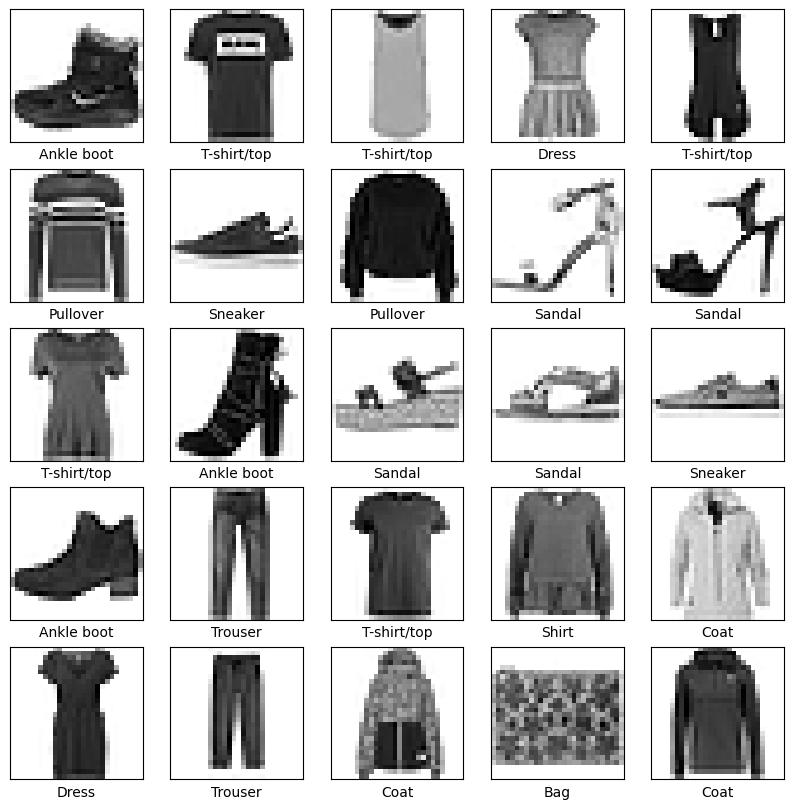

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from keras.models import Model
from keras.layers import (
    Dense,
    Input,
    Add,
    Activation,
    BatchNormalization,
    Dropout,
)
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.optimizers import Adam
from keras import regularizers

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Flatten the images for DNN
x_train_flat = x_train.reshape(-1, 28*28)
x_test_flat = x_test.reshape(-1, 28*28)

# Visualize some samples
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[np.argmax(y_train[i])])
plt.show()

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Activation, Dropout, Add, GaussianNoise, Flatten
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

def residual_block(x, units):
    shortcut = x
    if x.shape[-1] != units:
        shortcut = Dense(units, kernel_regularizer=regularizers.l2(0.002))(shortcut)
    x = Dense(units, kernel_regularizer=regularizers.l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(units, kernel_regularizer=regularizers.l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Add()([x, shortcut])
    x = Activation("relu")(x)
    return x

def create_resnet_dnn():
    inputs = Input(shape=(784,))
    x = GaussianNoise(0.2)(inputs)
    x = BatchNormalization()(x)
    x = Dense(1024, kernel_regularizer=regularizers.l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = Dense(768, kernel_regularizer=regularizers.l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = residual_block(x, 512)
    x = Dense(384, kernel_regularizer=regularizers.l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = residual_block(x, 256)
    x = Dense(128, kernel_regularizer=regularizers.l2(0.002))(x)
    x = BatchNormalization()(x)
    x = Activation("relu")(x)
    x = residual_block(x, 128)
    x = Dropout(0.3)(x)
    x = Flatten()(x)
    outputs = Dense(10, activation="softmax")(x)
    return Model(inputs, outputs)

resnet_model = create_resnet_dnn()
resnet_model.compile(
    optimizer=SGD(learning_rate=0.01, momentum=0.9, nesterov=True),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)

resnet_history = resnet_model.fit(
    x_train_flat,
    y_train,
    validation_split=0.15,
    batch_size=192,
    epochs=40,
    callbacks=[
        EarlyStopping(patience=8, restore_best_weights=True, monitor="val_accuracy", min_delta=0.001),
        ReduceLROnPlateau(patience=5, factor=0.5, min_lr=1e-6, monitor="val_accuracy", verbose=1),
    ],
    verbose=1,
)

Epoch 1/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 24s 45ms/step - accuracy: 0.6266 - loss: 11.2026 - val_accuracy: 0.8117 - val_loss: 9.1785 - learning_rate: 0.0100
Epoch 2/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8250 - loss: 8.6851 - val_accuracy: 0.8399 - val_loss: 7.4258 - learning_rate: 0.0100
Epoch 3/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8436 - loss: 7.0777 - val_accuracy: 0.8557 - val_loss: 6.0652 - learning_rate: 0.0100
Epoch 4/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8515 - loss: 5.7930 - val_accuracy: 0.8644 - val_loss: 4.9778 - learning_rate: 0.0100
Epoch 5/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8578 - loss: 4.7579 - val_accuracy: 0.8611 - val_loss: 4.1146 - learning_rate: 0.0100
Epoch 6/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8619 - loss: 3.9230 - val_accuracy: 0.8556 - val_loss: 3.4318 - learning_rate: 0.0100
Epoch 7/40
266/266 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.8667 - loss: 3.2572

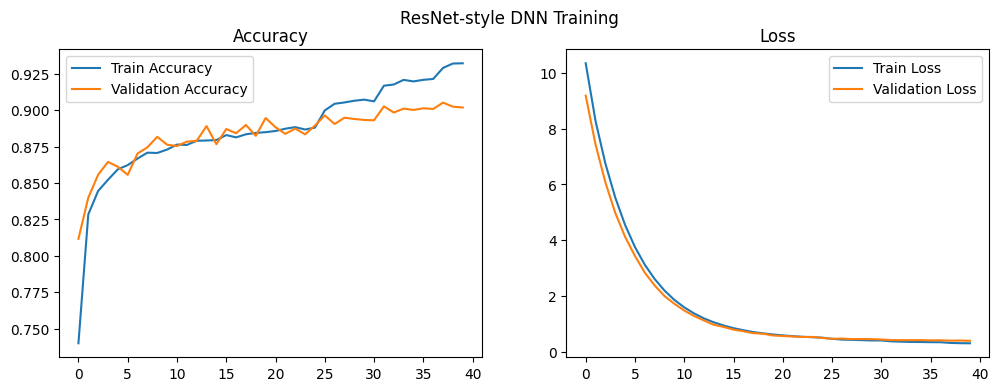

In [ ]:
def plot_history(history, title):
    plt.figure(figsize=(12, 4))
    plt.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.plot(history.history["accuracy"], label="Train Accuracy")
    plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
    plt.title("Accuracy")
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history["loss"], label="Train Loss")
    plt.plot(history.history["val_loss"], label="Validation Loss")
    plt.title("Loss")
    plt.legend()

    plt.show()
plot_history(resnet_history, "ResNet-style DNN Training")

In [ ]:
resnet_test_loss, resnet_test_acc = resnet_model.evaluate(
    x_test_flat, y_test, verbose=0
)
print(f"ResNet-style DNN Test Accuracy: {resnet_test_acc:.4f}")

ResNet-style DNN Test Accuracy: 0.9014



ResNet-style DNN Predictions:
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step


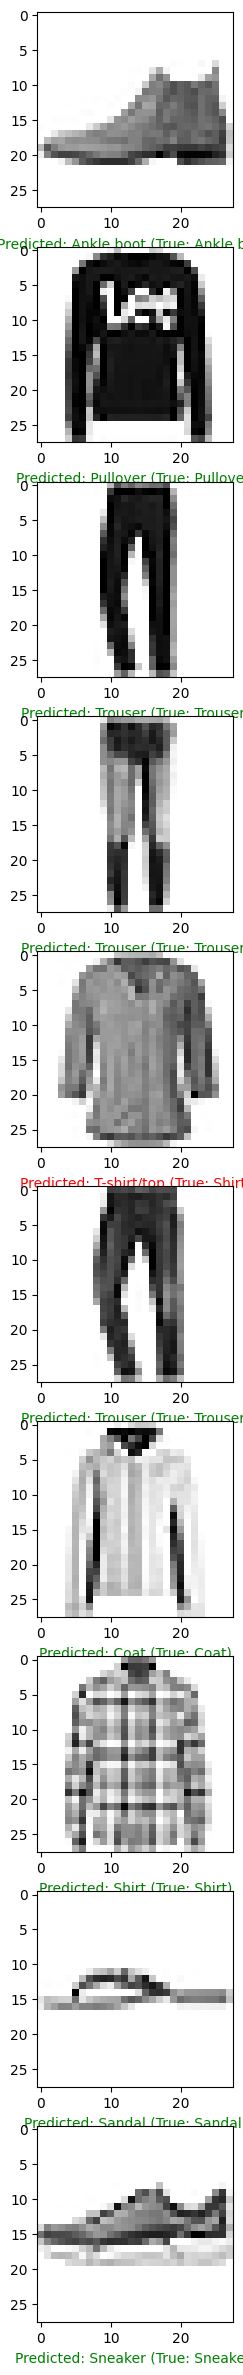

In [ ]:
def plot_predictions(model, x_test, y_test, num_images=10): # Added num_images with a default value
    # Use the provided model instance to make predictions
    predictions = model.predict(x_test)
    plt.figure(figsize=(15, 3 * num_images))
    for i in range(num_images):
        plt.subplot(num_images, 1, i + 1)
        # Reshape the flattened image data for plotting
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        pred_label = np.argmax(predictions[i])
        true_label = np.argmax(y_test[i])
        color = "green" if pred_label == true_label else "red"
        plt.xlabel(
            f"Predicted: {class_names[pred_label]} (True: {class_names[true_label]})",
            color=color,
        )
    plt.show()


print("\nResNet-style DNN Predictions:")
# Pass the resnet_model instance and the flattened test data (x_test_flat)
plot_predictions(resnet_model, x_test_flat, y_test)

**KEY FEATURES**

1. Residual Blocks: Helps deeper layers learn without vanishing gradients.

2. Regularization: Uses L2 regularization, Dropout, and Gaussian Noise to prevent overfitting.

3. Batch Normalization: Stabilizes and speeds up training.

4. SGD Optimizer with Momentum: Improves convergence with Nesterov acceleration.

5. Training Callbacks: EarlyStopping and ReduceLROnPlateau for smarter training control.